# GYMNASIEARBETE | MARTA RELIGA

In [4]:
#Ladda ner alla bibliotek och datatabellen i en Pandas dataframe och visa datan 

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_5211cd5cc0734e158a48c3d67f9daa47 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_5211cd5cc0734e158a48c3d67f9daa47 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_5211cd5cc0734e158a48c3d67f9daa47 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LA5W3NT-fyXpfyKW1syQyWboU7xjsTxQdiW4jx2hNrAC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_5211cd5cc0734e158a48c3d67f9daa47)

body = client_5211cd5cc0734e158a48c3d67f9daa47.get_object(Bucket='gymnasiearbete-donotdelete-pr-tnhicbhd6gsqdm',Key='covid19data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )



In [2]:
import os, types
import pandas as pd
df = pd.read_csv('covid19data.csv', sep=';')
df.head()

,Unnamed: 0,Age,Sex,Wave,BMI,BloodpressureD,BloodpressureS,Temp,Pulse,Diagnoses,Mortality
0,1,86,Women,Wave2 (9/2021-1/2021),26.813590,80.0,130.0,37.7,89.0,7,0
1,2,77,Men,Wave2 (9/2021-1/2021),NaN,88.0,133.0,37.0,88.0,7,1
2,3,85,Men,Wave1 (3-8/2020),26.672763,70.0,120.0,37.4,89.0,5,0
3,4,72,Men,Wave1 (3-8/2020),31.573333,79.0,138.0,36.9,88.0,4,0
4,5,102,Women,Wave1 (3-8/2020),NaN,60.0,140.0,38.4,70.0,4,1


In [3]:
#Får en överblick över datan
df.shape

(5121, 11)

In [4]:
#Vi har 5121 patienter och 11 kolonner
#hur många dog av covid? 
df['Mortality'].value_counts()

0    4256
1     865
Name: Mortality, dtype: int64

In [9]:
#865 (1 betyder avliden)
#Kolla hur många värden som saknas i de olika kolonnerna
df.isna().sum()

Unnamed: 0           0
Age                  0
Sex                  0
Wave                 0
BMI               2104
BloodpressureD      76
BloodpressureS      74
Temp                44
Pulse               53
Diagnoses            0
Mortality            0
dtype: int64

In [10]:
#Se medelvärdet i varhe kolonn
df.mean()

/var/folders/sz/9lmhb0rd5bj43pzsvvt2s0nw0000gn/T/ipykernel_37237/1584104947.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0        2561.000000
Age                 81.962703
BMI                 25.213570
BloodpressureD      72.970268
BloodpressureS     131.411135
Temp                37.030333
Pulse               78.906965
Diagnoses            5.945909
Mortality            0.168912
dtype: float64

In [11]:
#Äldsta patienten
df["Age"].max()

104

In [12]:
#Yngsta patienten 
df["Age"].min()

47

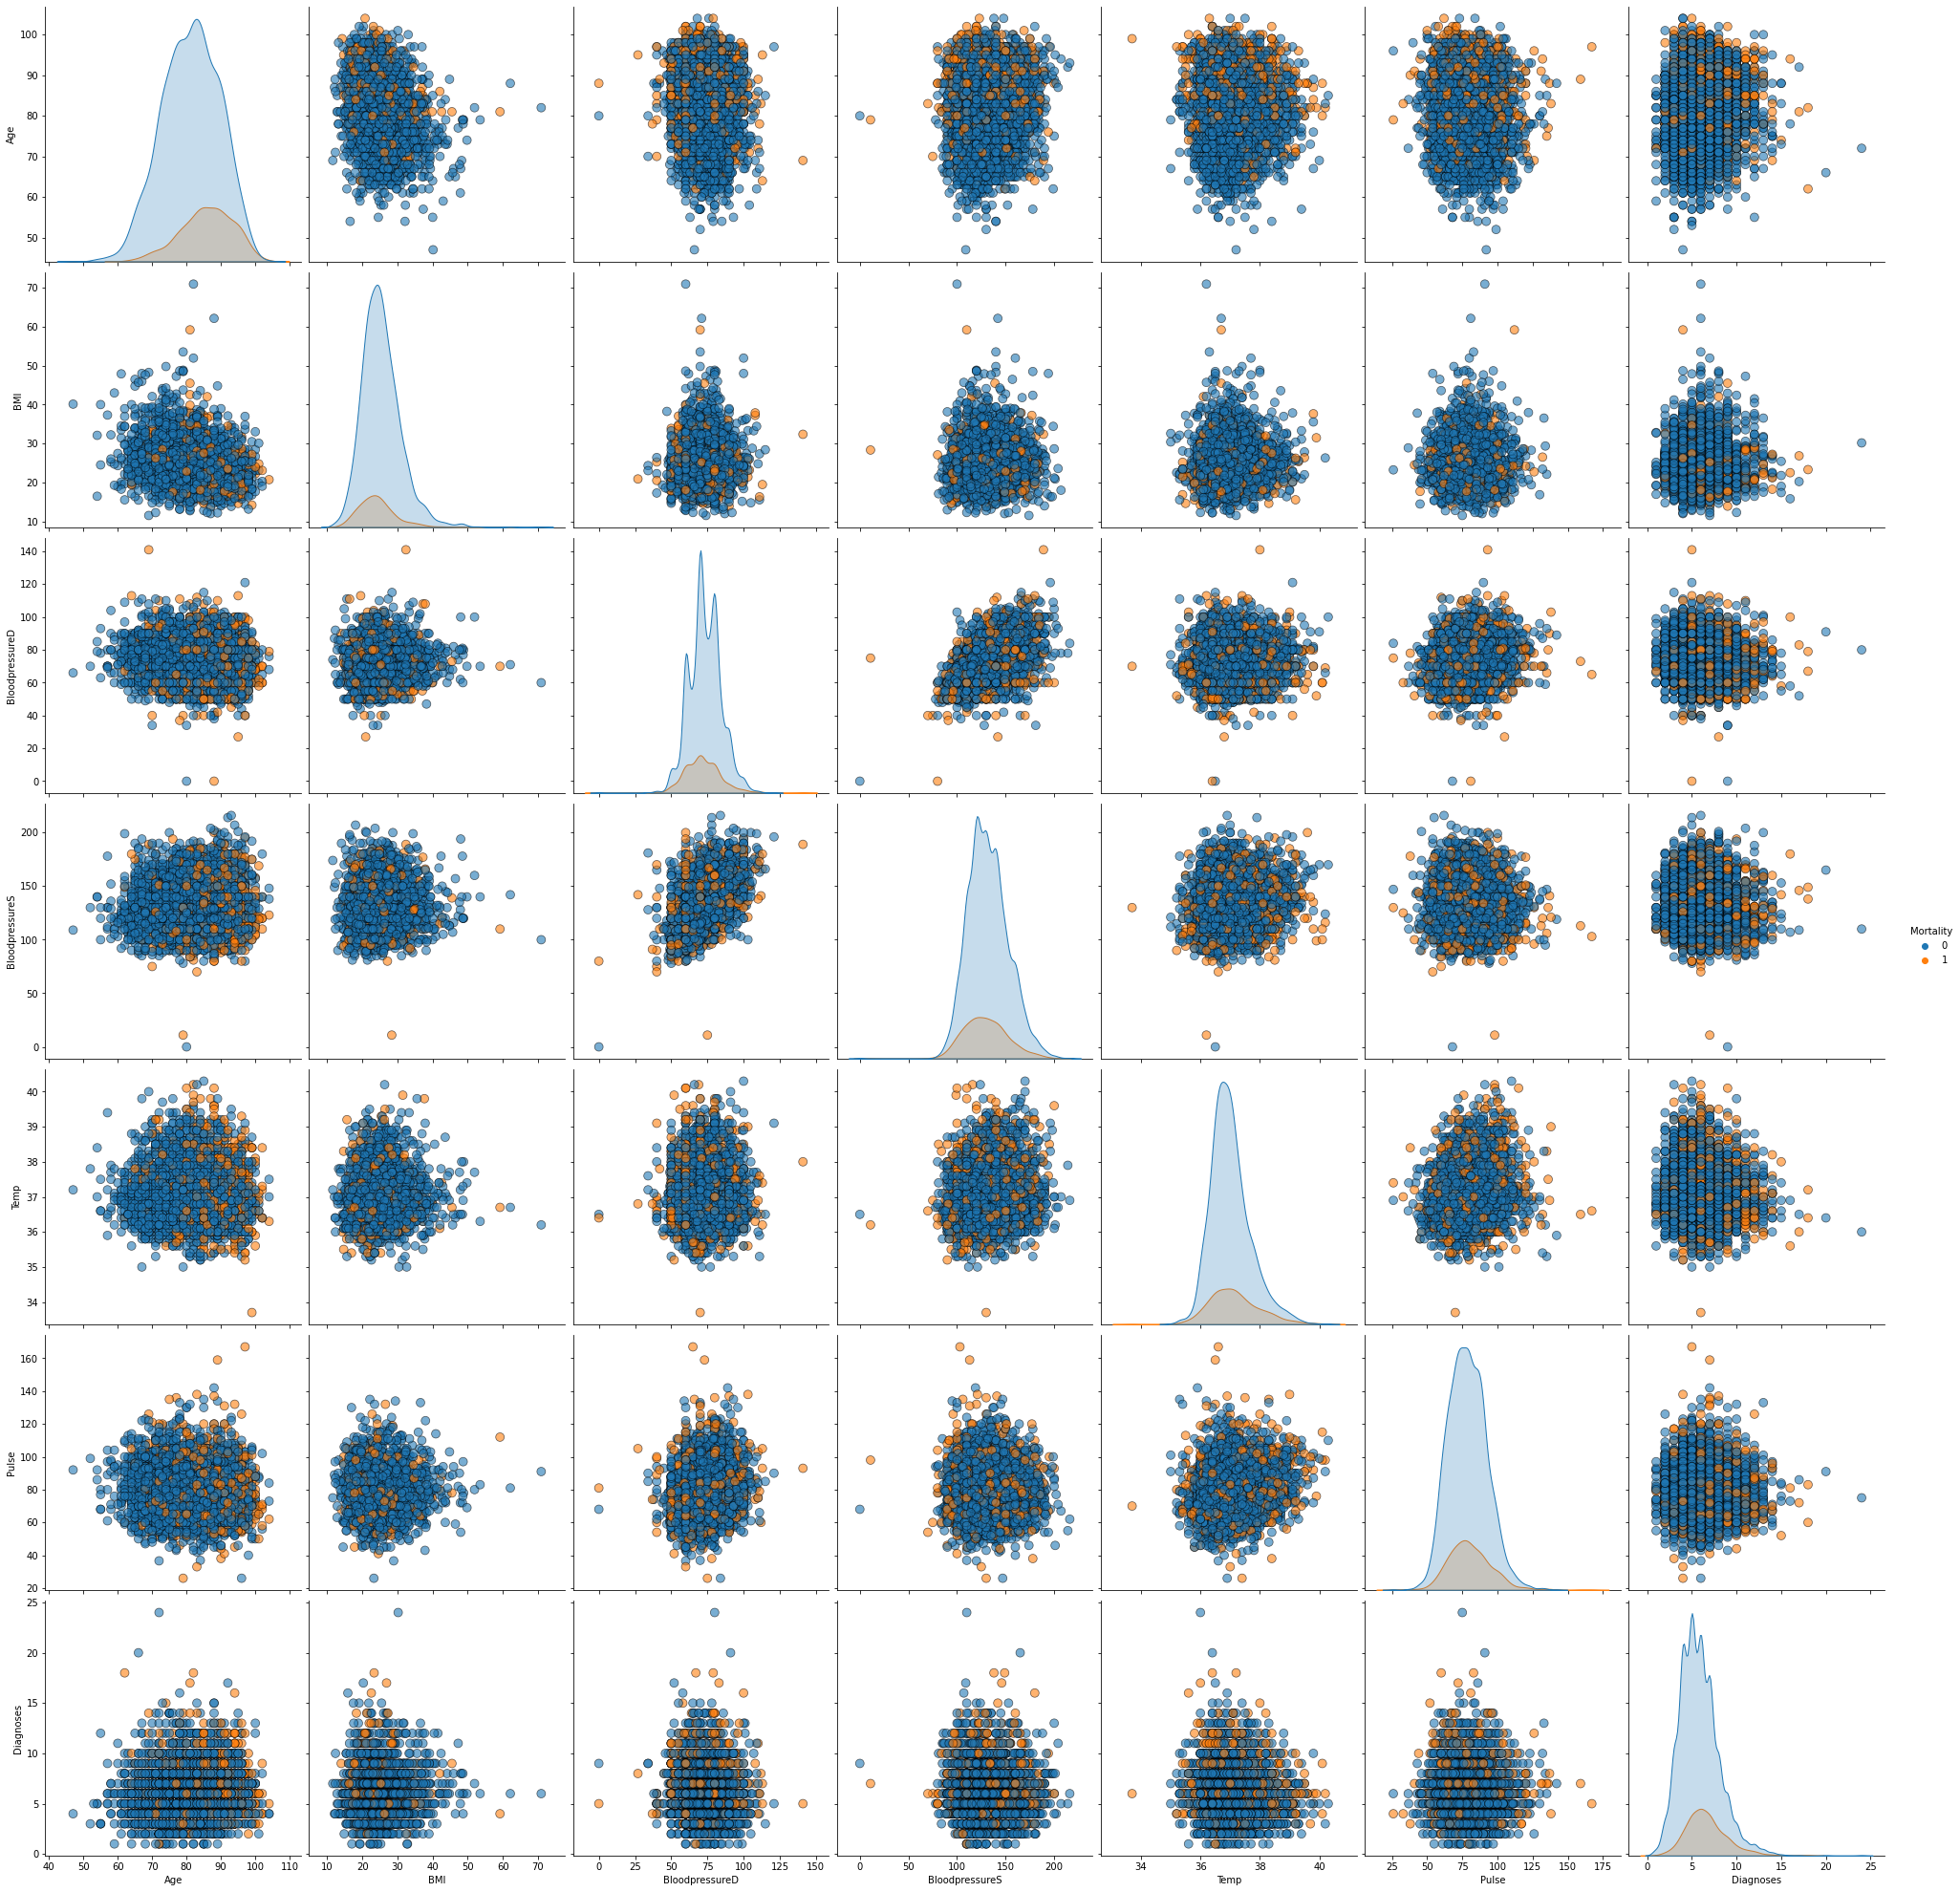

In [13]:
#Plotta samband mellan de olika variablerna 
import seaborn as sns
df_new = df[["Mortality", "Age", "BMI", "BloodpressureD", "BloodpressureS", "Temp", "Pulse", "Diagnoses"]]
sns.pairplot(df_new, hue = 'Mortality', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

#Orange prick är avliden, blå är ej avliden

In [14]:
#Skapa en ny dataframe med data för patienterna som avled
df_mask=df['Mortality']==1
df1 = df[df_mask]
df1.mean()

/var/folders/sz/9lmhb0rd5bj43pzsvvt2s0nw0000gn/T/ipykernel_37237/4168334872.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


Unnamed: 0        2607.522543
Age                 85.867052
BMI                 24.186131
BloodpressureD      71.542755
BloodpressureS     129.226572
Temp                37.150059
Pulse               80.466510
Diagnoses            6.616185
Mortality            1.000000
dtype: float64

In [15]:
df_mask=df['Mortality']==0
df2 = df[df_mask]
df2.mean()

/var/folders/sz/9lmhb0rd5bj43pzsvvt2s0nw0000gn/T/ipykernel_37237/1531517736.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


Unnamed: 0        2551.544643
Age                 81.169173
BMI                 25.344495
BloodpressureD      73.256246
BloodpressureS     131.849191
Temp                37.006223
Pulse               78.592246
Diagnoses            5.809680
Mortality            0.000000
dtype: float64

In [16]:
df.mean()

/var/folders/sz/9lmhb0rd5bj43pzsvvt2s0nw0000gn/T/ipykernel_37237/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0        2561.000000
Age                 81.962703
BMI                 25.213570
BloodpressureD      72.970268
BloodpressureS     131.411135
Temp                37.030333
Pulse               78.906965
Diagnoses            5.945909
Mortality            0.168912
dtype: float64

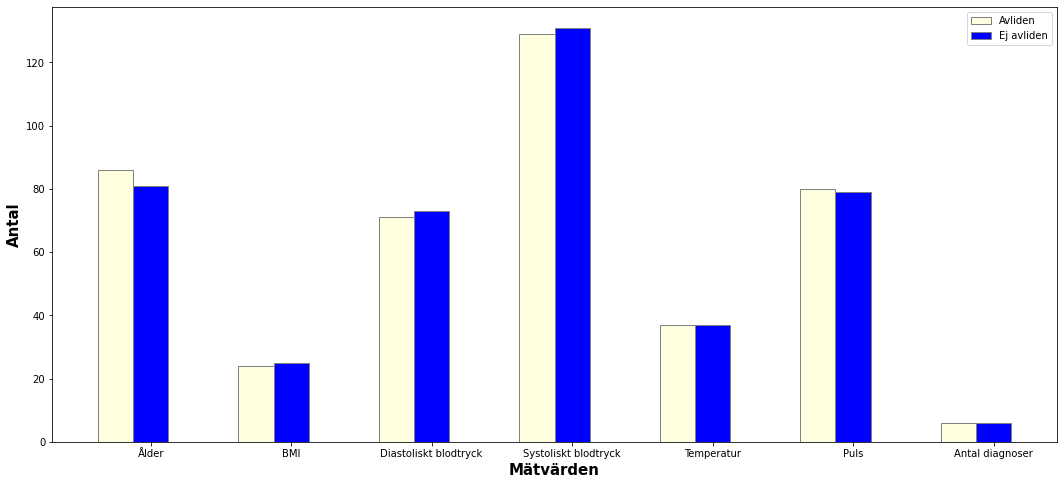

In [17]:
#Plottar medelvärden för patienterna som avled och för dem som överlevde
import numpy as np
import matplotlib.pyplot as plt
 
barWidth = 0.25
fig = plt.subplots(figsize =(18, 8))
 
Avliden = [86, 24.1, 71, 129, 37.1, 80, 6]
ejAvliden = [81, 25, 73, 131, 37, 79, 6]

 
br1 = np.arange(len(Avliden))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
plt.bar(br1, Avliden, color ='lightyellow', width = barWidth,
        edgecolor ='grey', label ='Avliden')
plt.bar(br2, ejAvliden, color ='b', width = barWidth,
        edgecolor ='grey', label ='Ej avliden')
 
plt.xlabel('Mätvärden', fontweight ='bold', fontsize = 15)
plt.ylabel('Antal', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Avliden))],
        ['Ålder', 'BMI', 'Diastoliskt blodtryck', 'Systoliskt blodtryck', 'Temperatur', 'Puls', 'Antal diagnoser'])
 
plt.legend()
plt.show()

In [18]:
#Saknade värden är en stor felkälla
#För att kunna träna algoritmen behöver man ersätta dem med något. 
#Jag valde att ersätta dem med medelvärdet för den kolonnen
bloodpressureD = df["BloodpressureD"].mean()
bloodpressureS = df["BloodpressureS"].mean()
temp = df["Temp"].mean()
pulse = df["Pulse"].mean()
bmi = df["BMI"].mean()
df["BloodpressureD"] = df["BloodpressureD"].fillna(bloodpressureD)
df["BloodpressureS"] = df["BloodpressureS"].fillna(bloodpressureS)
df["Temp"] = df["Temp"].fillna(temp)
df["Pulse"] = df["Pulse"].fillna(pulse)
df["BMI"] = df["BMI"].fillna(bmi)

#dubbelkolla att inget saknas
df.isna().sum()

Unnamed: 0        0
Age               0
Sex               0
Wave              0
BMI               0
BloodpressureD    0
BloodpressureS    0
Temp              0
Pulse             0
Diagnoses         0
Mortality         0
dtype: int64

In [19]:
#På dessa värden ska algoritmen tränas
Feature = df[['Age', 'Sex', 'BMI', 'BloodpressureD', 'BloodpressureS', 'Temp', 'Pulse', 'Diagnoses']]
X = Feature
X[0:5]

,Age,Sex,BMI,BloodpressureD,BloodpressureS,Temp,Pulse,Diagnoses
0,86,Women,26.813590,80.0,130.0,37.7,89.0,7
1,77,Men,25.213570,88.0,133.0,37.0,88.0,7
2,85,Men,26.672763,70.0,120.0,37.4,89.0,5
3,72,Men,31.573333,79.0,138.0,36.9,88.0,4
4,102,Women,25.213570,60.0,140.0,38.4,70.0,4


In [20]:
#Detta är våra labels
Y = df['Mortality'].values
Y[0:5]

array([0, 1, 0, 0, 1])

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Ändra paramterarna till normaliserade tal (ibland kan det vara bättre att använda normaliserade värden)
sex=le.fit_transform(df["Sex"])
age = le.fit_transform(df["Age"])
pulse=le.fit_transform(df["Pulse"])
temp=le.fit_transform(df["Temp"])
diagnoses=le.fit_transform(df["Diagnoses"])
bmi=le.fit_transform(df["BMI"])
bloodpressureD=le.fit_transform(df["BloodpressureD"])
bloodpressureS=le.fit_transform(df["BloodpressureS"])
print(sex)
print(age)
print(pulse)
print(temp)
print(bmi)
print(bloodpressureS)
print(bloodpressureD)

[1 0 0 ... 0 0 1]
[34 25 33 ... 40 33 38]
[55 54 55 ... 58 56 28]
[28 20 25 ... 16 14 23]
[1723 1431 1706 ... 2144 1431 1431]
[54 58 44 ... 44 59 65]
[44 52 33 ... 44 55 33]


In [23]:
#På dessa värden ska algoritmen tränas
Feature = df[['Age', 'Sex', 'BMI', 'BloodpressureD', 'BloodpressureS', 'Temp', 'Pulse', 'Diagnoses']]
X = Feature
X[0:5]

,Age,Sex,BMI,BloodpressureD,BloodpressureS,Temp,Pulse,Diagnoses
0,86,Women,26.813590,80.0,130.0,37.7,89.0,7
1,77,Men,25.213570,88.0,133.0,37.0,88.0,7
2,85,Men,26.672763,70.0,120.0,37.4,89.0,5
3,72,Men,31.573333,79.0,138.0,36.9,88.0,4
4,102,Women,25.213570,60.0,140.0,38.4,70.0,4


In [24]:
features = list(zip(sex, age, bmi, temp, pulse, bloodpressureS, bloodpressureD, diagnoses))

In [25]:
features2 = list(zip(sex, df["Age"], df["BMI"], df["BloodpressureS"], df["BloodpressureD"], df["Temp"], df["Pulse"], df["Diagnoses"]))

In [26]:
#Detta är våra labels
Y = df['Mortality'].values
Y[0:5]

array([0, 1, 0, 0, 1])

In [34]:
print(features2[:5])

[(1, 86, 26.81359045, 130.0, 80.0, 37.7, 89.0, 7), (0, 77, 25.213569866672177, 133.0, 88.0, 37.0, 88.0, 7), (0, 85, 26.6727633, 120.0, 70.0, 37.4, 89.0, 5), (0, 72, 31.57333333, 138.0, 79.0, 36.9, 88.0, 4), (1, 102, 25.213569866672177, 140.0, 60.0, 38.4, 70.0, 4)]


In [27]:
from sklearn.model_selection import train_test_split
#80% träna 20% testa 
X_train, X_test, y_train, y_test = train_test_split(features2, Y, test_size=0.2)

In [28]:
#Här kan man se vilka features som spelar mest roll för utfallet om man hade tränat modellen med embedded learning 
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(features,Y)
etr_model.feature_importances_

array([0.02277756, 0.16317944, 0.11830905, 0.15796906, 0.14775414,
       0.13885566, 0.13605085, 0.11510424])

<AxesSubplot:>

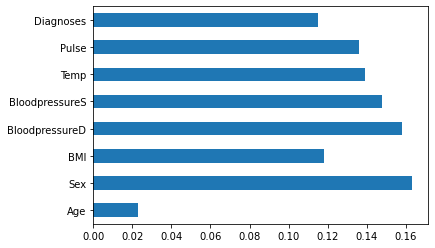

In [29]:
#Visualisera talen ovan i en graf 
feat_importances = pd.Series(etr_model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

# LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Resutat på test:" + str(lr.score(X_test, y_test)))
print("Resultat på train: "+ str(lr.score(X_train, y_train)))

Resutat på test:0.8263414634146341
Resultat på train: 0.83203125


In [28]:
#Dessa är ganska lika, vilket betyder att den inte överanpassar
#Train är till och med lägre än test!

In [36]:
import pickle
pickle.dump(lr, open('lr.sav','wb'))

In [35]:
from sklearn import metrics
y_pred=lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[844,   7],
       [171,   3]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Här ska jag kolla hur många som blev fel i varje kategori
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# gör en heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# DECISION TREES

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Resultat på test:"  + str(clf.score(X_test, y_test)))
print("Resultat på train: "+ str(clf.score(X_train, y_train)))

Resultat på test:0.728780487804878
Resultat på train: 1.0


In [29]:
#Tydlig överanpassning
y_pred=clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[701, 152],
       [126,  46]])

Text(0.5, 257.44, 'Predicted label')

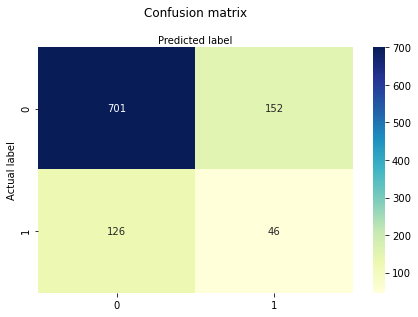

In [30]:
#Samma sak som ovan, kollar hur många som blev fel på varje 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#här kan man mata in värden för nya patienter 
#Samma ordning: sex, age, bmi, temp, pulse, bloodpressureS, bloodpressureD, diagnoses
predicted= clf.predict([[]])
print(predicted)

# K- NEAREST NEIGHBOUR

In [32]:
#Träna modellen
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Resultat på test:",metrics.accuracy_score(y_test, y_pred))
print("Resultat på train: "+ str(knn.score(X_train, y_train)))

Resultat på test: 0.833170731707317
Resultat på train: 0.833251953125


In [33]:
#Den överanpassar inte heller 
y_pred=knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[843,  10],
       [161,  11]])

Text(0.5, 257.44, 'Predicted label')

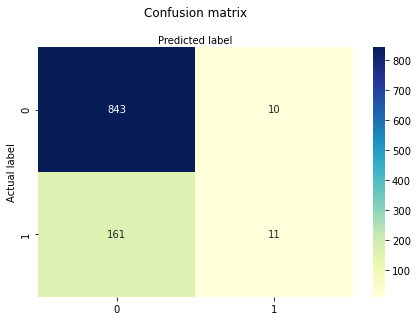

In [34]:
#Samma sak som ovan, kollar hur många som blev fel på varje 
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
#här kan man mata in värden för nya patienter 
#Samma ordning: sex, age, bmi, temp, pulse, bloodpressureS, bloodpressureD, diagnoses
predicted= knn.predict([[]])
print(predicted)

[1]


# RESULTS

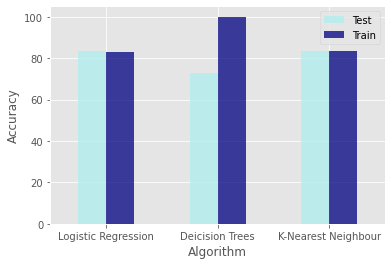

In [51]:
#Sammanställning av resultaten 
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({ 'celltype':["Logistic Regression","Deicision Trees", "K-Nearest Neighbour"], 'Test':[83.3, 72.9, 83.3], 'Train':[83.2, 100, 83.3]})
df = df[["celltype","Test","Train"]]
df.set_index(["celltype"],inplace=True)
df.plot(kind='bar',alpha=0.75, rot=0, color = ['lightyellow', "navy"])
plt.ylabel("Accuracy")
plt.xlabel("Algorithm")
plt.show()